# Mamdani - Alcohol consumption

A study revealed the following.<p>
Alcohol consumption in a population is measured on a scale of 0 - 100.<p>
(0 - minimum  100 - maximum)

Water consumption in the population is measured on a scale of 0 - 10.<p>
(0 - minimum  10 - maximum)<p>

The life span of the population is defined on a scale of 10 - 50<p>
(10 - maximum    50 - minimum)<p>

Given the drinks consumption of an individual determine the lifespan<p>
R1 : Less water and more alcohol implies poor life span<p>
R2 : More water and less alcohol implies good life span<p>
R3 : More water and average alcohol or less water and less alcohol implies average life span<p>

In [ ]:
# Imports necessary modules/packages and sets up the environment for experimentation.
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload

# Navigate up to the project root directory dynamically.
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# Add the project root to the system path to import custom modules from mylibs package.
sys.path.append(project_root)


# Import the custom module from the mylibs package.
import mylibs.membership_functions as mf

# import mylibs.fuzzy_functions as ff

### 1. Design Membership
<p> In this part, we design the membership definition (range/degree) - no data yet.

Important: If membership range goes wrong, the whole model can go wrong!

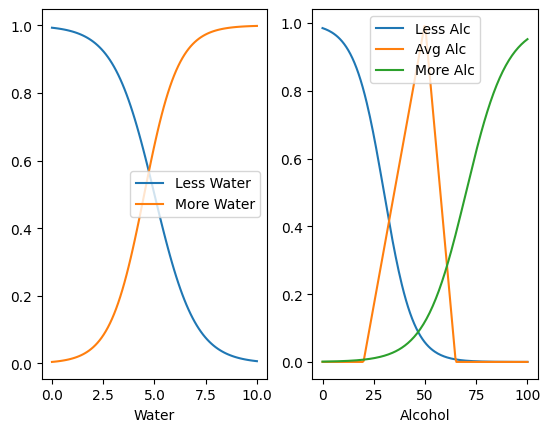

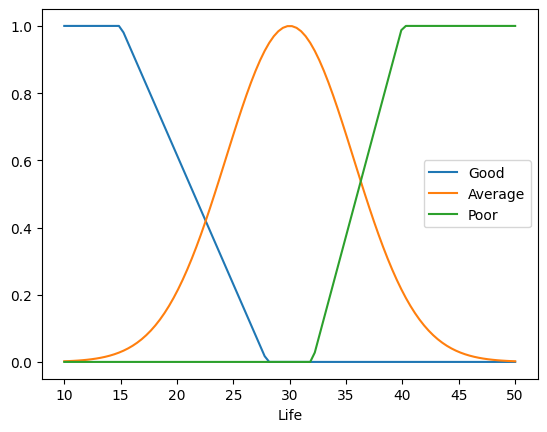

In [8]:
# Soiledness Membership Functions
water = np.linspace(0, 10, 100)
less_w = np.array([mf.sigmoid(x, -1, 5) for x in water])
more_w = np.array([mf.sigmoid(x, 1.2, 4.5) for x in water])

alc = np.linspace(0, 100, 200)
less_alc = np.array([mf.sigmoid(x, -0.14, 30) for x in alc])
avg_alc = np.array([mf.tri(x, 20, 50, 65) for x in alc])
more_alc = np.array([mf.sigmoid(x, 0.1, 70) for x in alc])

life = np.linspace(10, 50, 100)
good = np.array([mf.dec(x, 15, 28) for x in life])
avg = np.array([mf.gaussian(x, 30, 8) for x in life])
poor = np.array([mf.inc(x, 32, 40) for x in life])


# Water and Alcohol Plots
plt.figure(0)
plt.subplot(1, 2, 1)
plt.plot(water, less_w, label="Less Water")
plt.plot(water, more_w, label="More Water")
plt.legend()
plt.xlabel("Water")

plt.subplot(1, 2, 2)
plt.plot(alc, less_alc, label="Less Alc")
plt.plot(alc, avg_alc, label="Avg Alc")
plt.plot(alc, more_alc, label="More Alc")
plt.legend()
plt.xlabel("Alcohol")

# Life Plots
plt.figure(1)
plt.plot(life, good, label="Good")
plt.plot(life, avg, label="Average")
plt.plot(life, poor, label="Poor")
plt.legend()
plt.xlabel("Life")
plt.show()

### 1. Fuzzification

Input gets fuzzified.

In [ ]:
# Inputs needs to fuzzified using the membership functions defined above.
in_water = 7
in_water_less = mf.sigmoid(in_water, -1, 5)
in_water_more = mf.sigmoid(in_water, 1.2, 4.5)

in_alc = 30
in_alc_less = mf.sigmoid(in_alc, -0.14, 30)
in_alc_avg = mf.tri(in_alc, 20, 50, 65)
in_alc_more = mf.sigmoid(in_alc, 0.1, 70)

# Water Plots with input fuzzified points
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(water, less_w, label="Less Water")
plt.plot(water, more_w, label="More Water")
plt.scatter([in_water, in_water], [in_water_less, in_water_more])
plt.xlabel("Water")
plt.legend()

# Alcohol Plots with input fuzzified points
plt.subplot(1, 2, 2)
plt.plot(alc, less_alc, label="Less Alcohol")
plt.plot(alc, avg_alc, label="Average Alcohol")
plt.plot(alc, more_alc, label="More Alcohol")

plt.scatter([in_alc, in_alc, in_alc], [in_alc_less, in_alc_avg, in_alc_more])
plt.xlabel("Alcohol")
plt.legend()

plt.show()


# For instance, when the water consumption is 7 liter, it has a membership of 0.12 in less-water and 0.95 in more-water.
# More on more-water.
print(f"fuzzified in_less_water: {in_water_less}")
print(f"fuzzified in_more_water: {in_water_more}")

# Similarly, when the alcohol consumption is 30 units, it has a membership of 0.5 in less-alcohol, 0.33 in average-alcohol
# and 0.18 in more-alcohol. Showing more on less-alcohol and average-alcohol than more-alcohol.
print(f"fuzzified in_alc_more: {in_alc_more}")
print(f"fuzzified in_avg_alc: {in_alc_avg}")
print(f"fuzzified in_less_alc: {in_alc_less}")

### 2. Rules
Must Do Composition with the Output - to evaluate the rules <p> 
A*B?? because R1 & R2 are matrices.

`np.fmin` - compares two arrays and returns a new array with the minima <a href=https://www.geeksforgeeks.org/python/numpy-fmin-in-python>Ref</a>

R1 = np.fmin(in_less_s,less_t) - compares ~0.7 with array and returns the minima

<p> Question: fmin returns minima and doesn't do max-min! So, how two matrices get composed?

In [18]:
reload(mf)
# Evaluation of Rules
# R1 : Less water and more alcohol implies poor life span
ant = np.min([in_water_less, in_alc_more])
R1 = np.fmin(ant, poor)

# R2 : More water and less alcohol implies good life span - >fmin used for AND; fmax for OR
ant = np.min([in_water_more, in_alc_less])
R2 = np.fmin(ant, good)

# R3 : (More water and average alcohol) or (less water and less alcohol) implies average life span - >should use fmax for OR??
ant = np.max(
    [np.min([in_water_more, in_alc_avg]), np.min([in_water_less, in_alc_less])]
)
R3 = np.fmin(ant, avg)

In [19]:
# summarize the Rules
R = np.maximum(np.maximum(R1, R2), R3)

### 3. Defuzzification 
Centroid - centre of any random 2D object. Integral used for finding the centroid.<p>
R forms a regions (union of R1 & R2). So, centre point of R is the defuzzified answer!

Why Y-axis centroid not calculated?<p>
- Because Y-axis is membership and only X-axis is the value that is needed.

Life Expectancy :  24.252096424509695


/var/folders/yp/vdrm484933lg_mwhpd44s76h0000gn/T/ipykernel_18705/4266121065.py:2: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  res = np.trapz(R * life, life) / np.trapz(R, life)


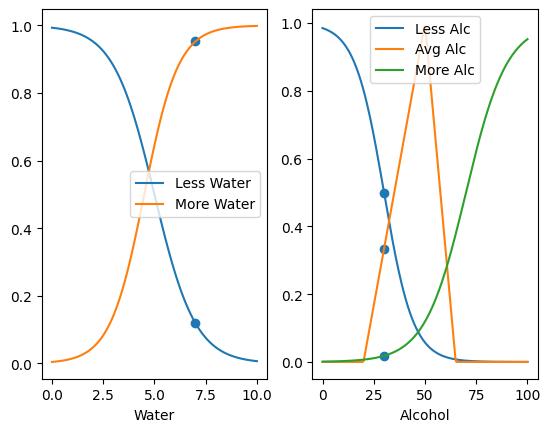

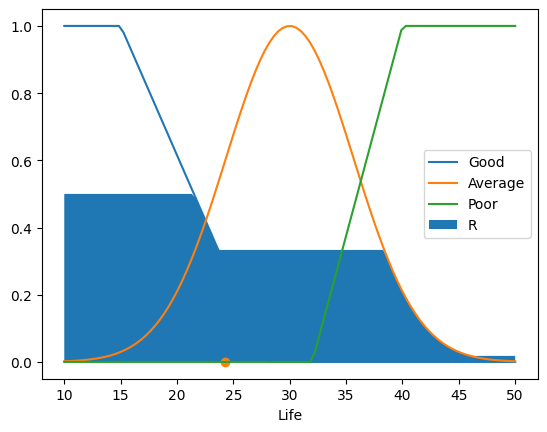

In [28]:
# Defuzzification
res = np.trapz(R * life, life) / np.trapz(R, life)
print("Life Expectancy : ", res)

# Plots
plt.figure(0)
plt.subplot(1, 2, 1)
plt.plot(water, less_w, label="Less Water")
plt.plot(water, more_w, label="More Water")
plt.scatter([in_water, in_water], [in_water_less, in_water_more])
plt.legend()
plt.xlabel("Water")

plt.subplot(1, 2, 2)
plt.plot(alc, less_alc, label="Less Alc")
plt.plot(alc, avg_alc, label="Avg Alc")
plt.plot(alc, more_alc, label="More Alc")
plt.scatter([in_alc, in_alc, in_alc], [in_alc_less, in_alc_avg, in_alc_more])
plt.legend()
plt.xlabel("Alcohol")

plt.figure(1)
plt.plot(life, good, label="Good")
plt.plot(life, avg, label="Average")
plt.plot(life, poor, label="Poor")
plt.fill_between(life, R, label="R")
plt.scatter(res, 0)
plt.legend()
plt.xlabel("Life")
plt.show()